# Прогнозирование оттока пользователей из сети фитнес-центров

# Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Задача — провести анализ и подготовить план действий по удержанию клиентов.

# Описание данных

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:


- 'Churn' — факт оттока в текущем месяце;


Текущие поля в датасете:


Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).


Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-базовые-рекомендации" data-toc-modified-id="Выводы-и-базовые-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и базовые рекомендации</a></span></li></ul></div>

## Загрузка данных

In [1]:
# импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from matplotlib import pyplot
from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.cluster.hierarchy import dendrogram, linkage 


from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
# записываем данные в табличку

gchurn = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
# смотрим инфо

gchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
# отрисовываем первые пять строк

gchurn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Был открыт и изучен файл с предоставленными данными.

## Предобработка данных

In [3]:
# приводим к лоуеркейсу названия колонок
gchurn.columns = [each.lower() for each in gchurn]

In [6]:
# смотрим пропуски
gchurn.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [7]:
# смотрим дубли
gchurn.duplicated().sum()

0

Привели к нижнему регистру названия колонок, убедились, что нет дублей и пропусков. Готово, данные восхитительны.

## Исследовательский анализ данных (EDA)

In [8]:
# посмотрим на датасет: есть ли в нем отсутствующие признаки, 
# изучим средние значения и стандартные отклонения

gchurn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Чтобы узнать разброс значений, среднюю стоимость и медиану, используем метод .describe(): у нас нет отсутствующих признаков, большинство живет поблизости, мало кто участвовал в акции "приведи друга", большинство оставило номер телефона, меньше половины посешает групповые занятия, средний возраст - 29 лет, средний размер прибыли с посетителя - 146, в среднем договор истекает через 4 месяца, занятия люди посещают пару раз в неделю.

In [9]:
# Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

display(gchurn.groupby('churn').mean())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Те, кто ушел, живут чуть дальше, реже являются сотрудниками фирм-партнеров, меньше приходят по акции "приведи друга". Так же у них примерно в три раза меньше срок договора, они немного младше (на три года), реже посещают групповые занятия (почти в два раза), приносят меньше прибыли (на 40). Времени до окончания договора около 1,5 месяцев (против 5 у тех, кто не в оттоке), средний лайфтайм этой когорты в 5 раз меньше (меньше месяца), а посещеют занятия они в полтора-два раза реже чем те, кто не ушел.

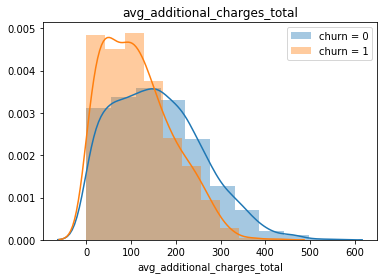

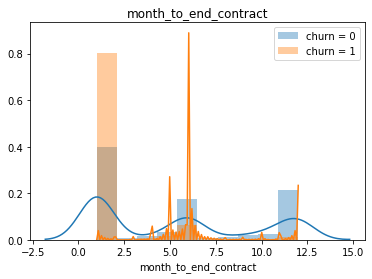

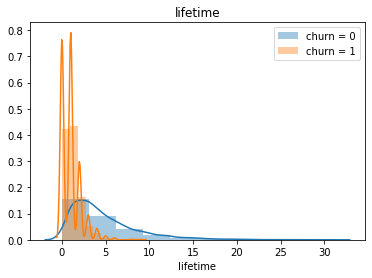

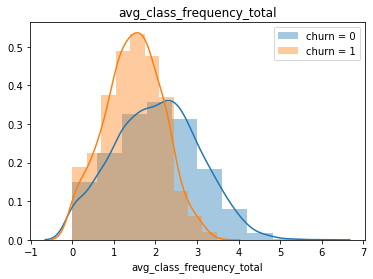

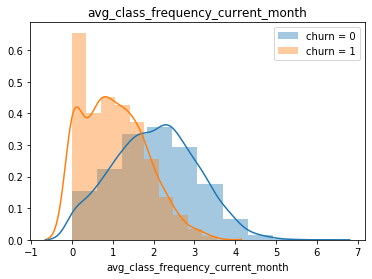

In [10]:
def feat_hist(dataframe, column_to_group, column_to_plot):
 
    for c in column_to_plot:
        for cl in dataframe[column_to_group].unique():
            sns.distplot(dataframe[dataframe[column_to_group]==cl][c], 
                         label='{} = {}'.format(column_to_group, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()

feat_hist(gchurn, 'churn', gchurn.drop(['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'churn'], axis = 1).columns)

Данные распределены нормально для количества занятий в неделю за все время, а также для количества занятй в неделю за последний месяц для группы, которая вне оттока. Для других данных распределение смещено влево, к более низким показателям, присутствуют заметные выбросы. Выделяется график со временем до окончания договора - сильно заметны выбросы у группы оттока для тех, у кого контракт заканчивается в ближайшее время.

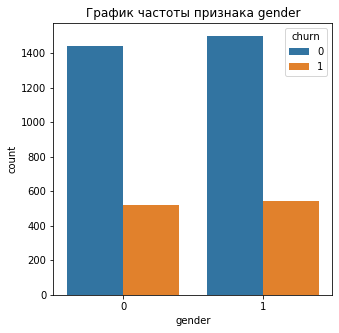

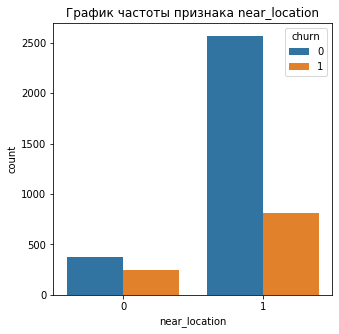

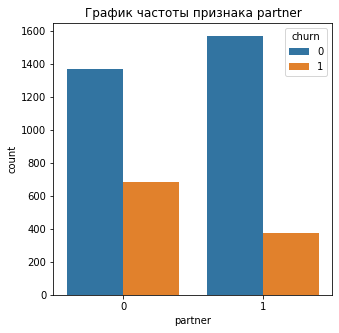

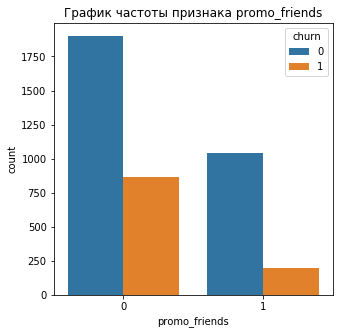

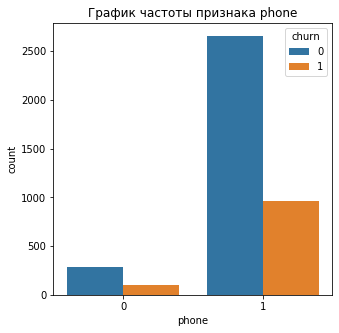

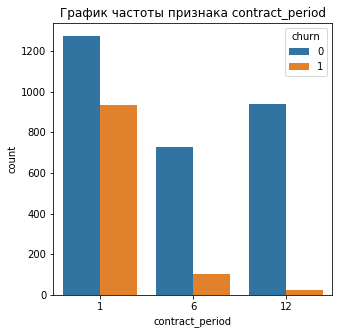

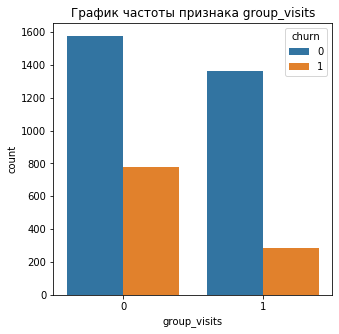

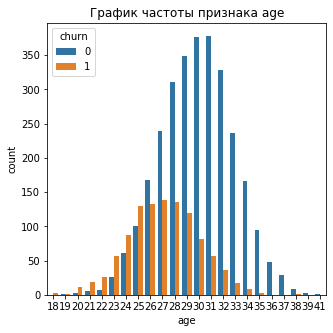

In [12]:
# столбчатые гистограммы в двух группах — тех, кто ушел в отток и тех, кто остался

for col in gchurn.drop(['churn', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'], axis = 1).columns:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = gchurn[col], hue = 'churn', data = gchurn)
    plt.title('График частоты признака {}'.format(col))
    plt.show()

В столбчатых гистограммах частоты можно обратить внимание на графики локации (ярко выделяется группа "не оттока" для тех, кто живет поблизости, график возраста (смещен к более маленьким цифрам для тех, кто ушел).

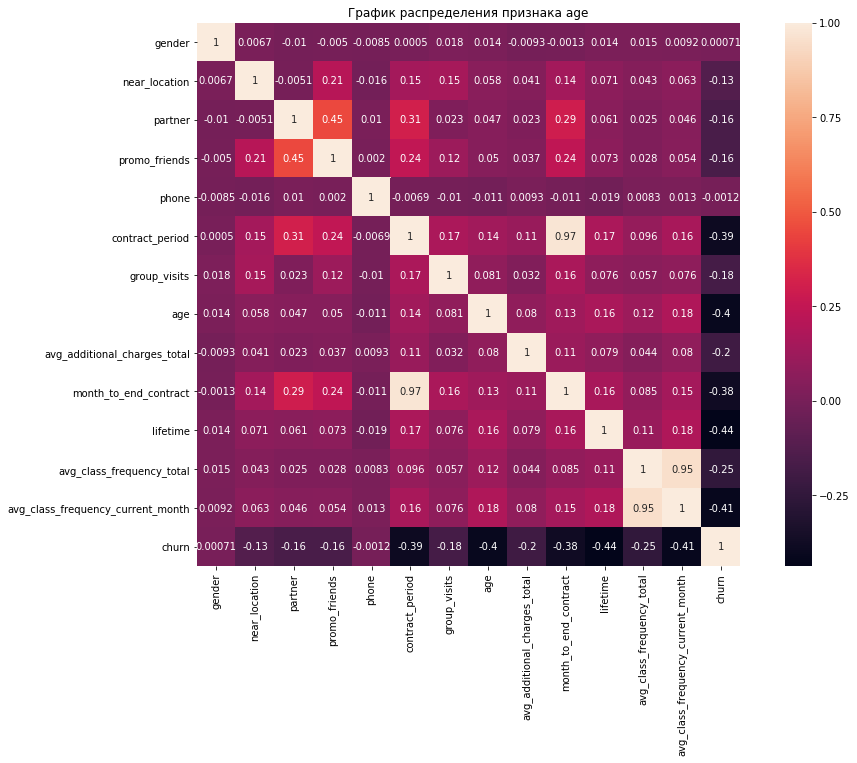

In [13]:
# строим матрицу корреляций 

cm = gchurn.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(cm, annot = True, square = True)
plt.title('Матрица корреляций')
plt.show()

Здесь выделим "черные" ячейки, как положительно влияющие на то, что клиент останется с нами - срок контракта, возраст, время до окончания договора, то, сколько клиент уже занимается в нашем центре, частота посещений за последний месяц. Все эти показатели чем больше, тем лучше.

Кроме того, замечена сильная корреляция между парами признаков "Количество месяцев в договоре" и "Количество месяцев до окончания договора", а также "Частота посещений зала за весь период в неделю" и "Частота посещений зала в неделю за последний месяц", что вполне логично.

## Модель прогнозирования оттока клиентов

In [6]:
X = gchurn.drop('churn', axis = 1)
y = gchurn['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### LogisticRegression

In [15]:
# зададим алгоритм для нашей модели
modelLR = LogisticRegression(solver='liblinear')

# обучим модель
modelLR.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
probabilitiesLR = modelLR.predict_proba(X_test)[:, 1]

# бинарный прогноз
predictionsLR = modelLR.predict(X_test)

# выведите все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictionsLR)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictionsLR)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictionsLR)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83


### RandomForestRegressor

In [16]:
warnings.filterwarnings("ignore")
# зададим алгоритм для нашей модели
modelRF = RandomForestClassifier(random_state=0) ### нужен random_state

# обучим модель
modelRF.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
probabilitiesRF = modelRF.predict_proba(X_test)[:, 1]

# бинарный прогноз
predictionsRF = modelRF.predict(X_test)

# выведите все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictionsRF)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictionsRF)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictionsRF)))

Accuracy: 0.91
Precision: 0.83
Recall: 0.78


### Вывод

Метрики модели LogisticRegression оказались более точными (на 0.02), точными (на 0.03) и полными (на 0.05).

## Кластеризация клиентов

In [7]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

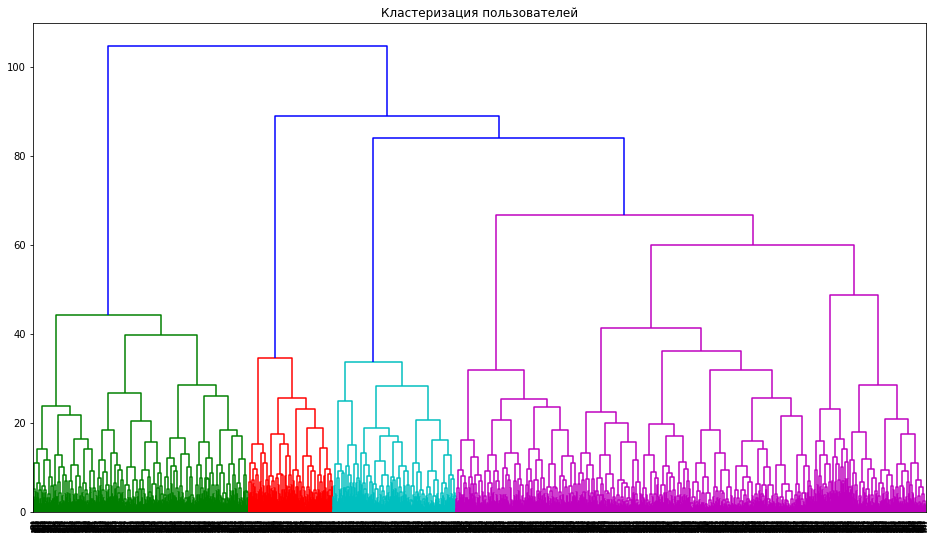

In [18]:
# отрисуем дендрограмму

plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

Цвета 4, следовательно, оставляем 4 кластера.

In [8]:
km = KMeans(n_clusters = 4, random_state=0)
labels = km.fit_predict(X_sc)
gchurn['cluster'] = labels

In [20]:
# создаем сводную табличку, разделенную по кластерам и смотрим проценты оттока
gchurn_pivot = gchurn.pivot_table(index='cluster', values='churn', 
                               aggfunc=['count', 'sum', lambda x: abs(round(((x == 0).sum() / x.count()-1)*100,2))]).reset_index()
gchurn_pivot.columns = ['cluster', 'count of members', 'churn', 'churn rate']
display(gchurn_pivot)

,cluster,count of members,churn,churn rate
0,0,386,103,26.68
1,1,1479,828,55.98
2,2,1057,98,9.27
3,3,1078,32,2.97


Самые лояльные - во втором и третьем кластерах.

In [21]:
# выводим статистику по средним значениям наших признаков по кластеру
gchurn.groupby(['cluster']).mean().T

cluster,0,1,2,3
gender,0.523316,0.486815,0.544939,0.503711
near_location,0.862694,0.759297,0.861873,0.940631
partner,0.471503,0.381339,0.343425,0.777365
promo_friends,0.305699,0.190669,0.205298,0.572356
phone,0.000000,1.000000,1.000000,1.000000
contract_period,4.777202,1.899256,2.403027,10.697588
group_visits,0.427461,0.292765,0.447493,0.536178
age,29.297927,28.048005,29.989593,29.912801
avg_additional_charges_total,144.208179,129.704525,157.358764,161.363032
month_to_end_contract,4.466321,1.805274,2.239357,9.768089


Те значения, на которые мы обратили внимание в EDA прослеживаются и здесь - срок контракта для второго кластера (около года), групповые посещения, возраст ближе к 30 годам, срок до истечения контракта больше, более высокий лайфтайм когорт и более частые посещения.

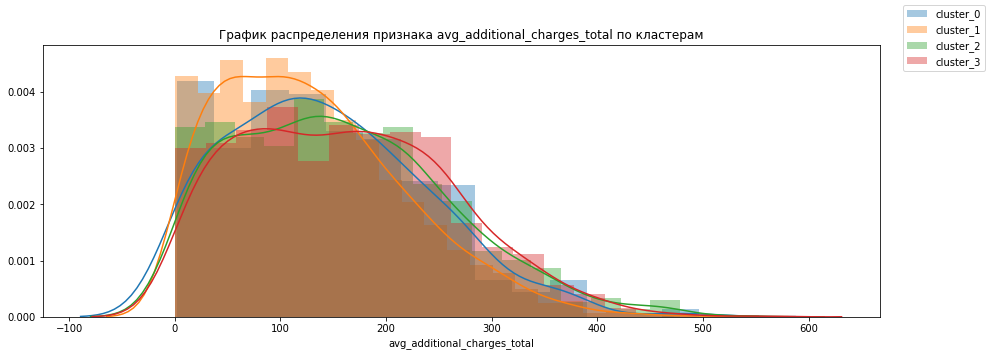

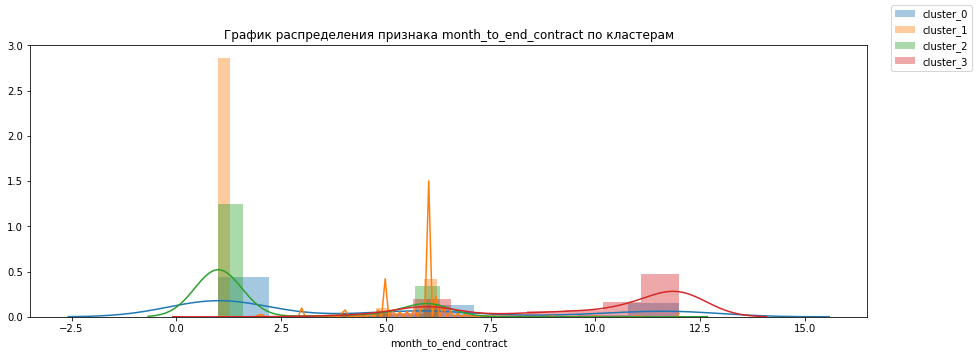

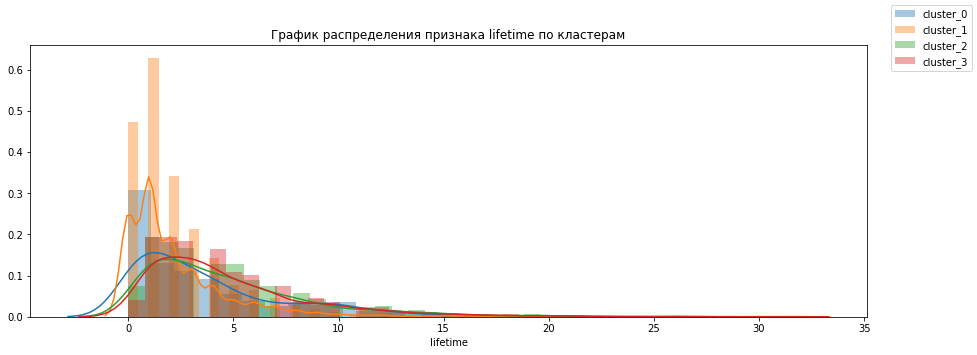

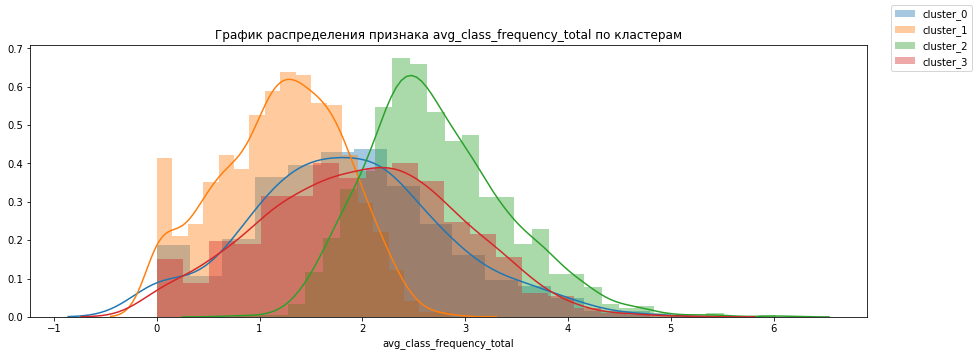

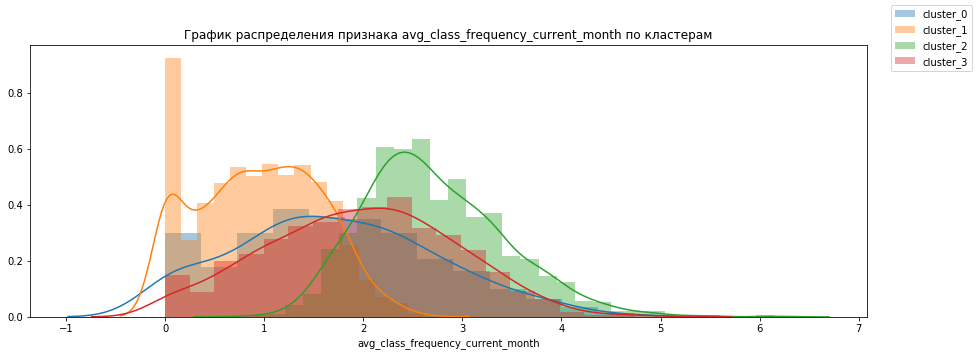

<Figure size 1080x360 with 0 Axes>

In [22]:
for col in gchurn.drop(['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'churn'], axis = 1).columns:
    fig = plt.figure(figsize=(15,5 ))
    #plt.figure(figsize=(15, 5))
    if col != 'cluster':
        cluster_0 = gchurn.loc[gchurn['cluster'] == 0]
        cluster_1 = gchurn.loc[gchurn['cluster'] == 1]
        cluster_2 = gchurn.loc[gchurn['cluster'] == 2]
        cluster_3 = gchurn.loc[gchurn['cluster'] == 3]

        sns.distplot(cluster_0[col])
        sns.distplot(cluster_1[col])
        sns.distplot(cluster_2[col])
        sns.distplot(cluster_3[col])
        fig.legend(labels=['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3'])
        plt.title('График распределения признака {} по кластерам'.format(col))
        plt.show()

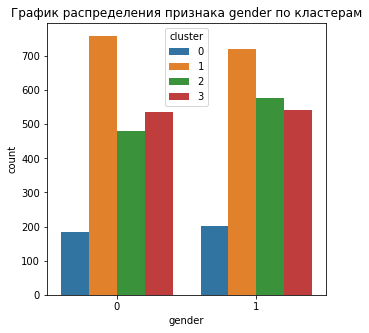

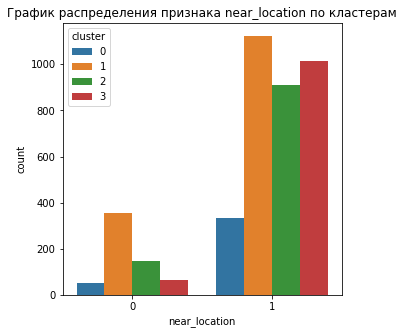

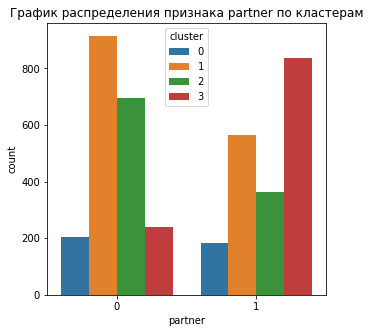

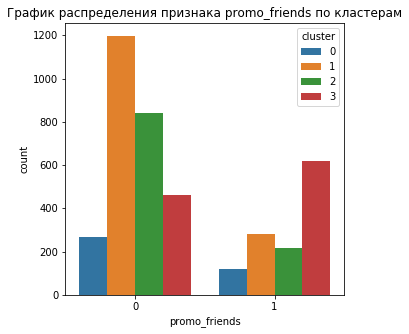

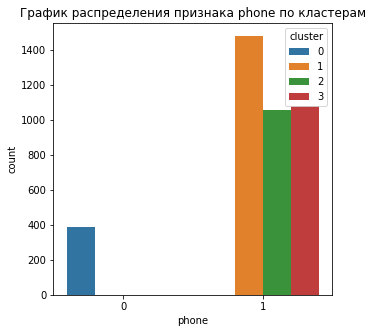

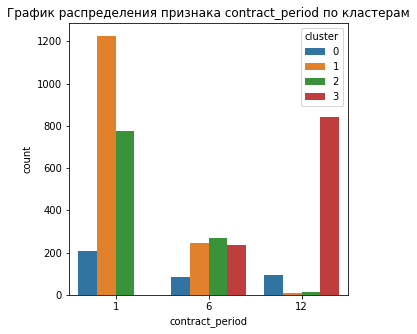

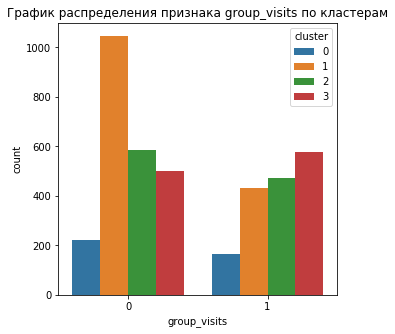

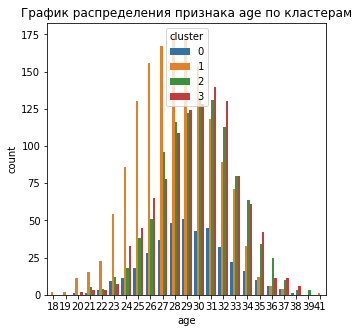

<Figure size 360x360 with 0 Axes>

In [23]:
for col in gchurn.drop(['churn', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'], axis = 1).columns:
    plt.figure(figsize = (5, 5))
    if col != 'cluster':
        plt.title('График распределения признака {} по кластерам'.format(col))
        sns.countplot(x = gchurn[col], hue = 'cluster', data = gchurn);    
    plt.show()

## Выводы и базовые рекомендации

Самыми лояльными клиентами оказались те, кто закреплен после кластеризации в кластерах 2 и 3, их характеризует близость проживания от фитнес-центра, длительный срок контракта, больший возраст, время до окончания договора, то, сколько клиент уже занимается в нашем центре, высокая частота посещений за последний месяц.

На основании проведенного исследования предлагается:
- Поддерживать клиентов из кластеров 2 и 3,
- Для привлечения новых клиентов сосредоточиться на таких, которые будут соответствовать портрету вышеуказанных кластеров (возраст ближе к 30 годам, проживающие неподалеку),
- Для мотивации тех, кто находится в группах оттока предложить дополнительные условия, которые позволят им "укрепиться" в фитнес-центре - например, возможность перейти в другой центр из нашей сети, но ближе к их дому, предложить бесплатные групповые занятия или пару пробных бесплатных занятий с тренером - иногда люди уходят, если у них нет четкого плана действий - что именно им нужно делать на занятиях,
- При привлечении новых клиентов создавать специальное предложение в формате более крупной скидки на абонемент с продолжительным сроком действия, либо акции формата 5 месяцев+1, 10 месяцев+2.